# Table of Contents

1. [Introduction](#Introduction)
2. [Required Modules](#Required-Modules)
3. [Data Preprocessing](#Data-Preprocessing)
  - [Key Features](#Key-Features)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Missing Values](#Missing-Values)
  - [Data Transformation](#Data-Transformation)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Visualization](#Visualization)
  - [Correlation](#Correlation)
5. [Model Building](#Model-Building)
  - [Decision Tree](#Decision-Tree)
  - [Random Forest](#Random-Forest)
  - [Logistic Regression](#Logistic-Regression)

6. [Evaluation](#Evaluation)
  - [Confusion Matrix](#Confusion-Matrix)
  - [Other Metrics](#Other-Metrics)
7. [Conclusion](#Conclusion)

## 1. Introduction <a name="Introduction"></a>

The goal of this project is to predict the occurrence of cardiovascular disease in patients by examining their medical records and medical history, enabling the calculation of the likelihood of cardiovascular disease.

By analyzing the patients' medical history and relevant health data and lifestyle factors, we aim to calculate the probability of cardiovascular disease occurrence in each patient. This predictive model can assist healthcare professionals in identifying individuals at high risk of developing cardiovascular disease, enabling early intervention and personalized preventive measures.


In the following sections, we will delve into the dataset, perform preprocessing tasks, conduct exploratory data analysis, build and evaluate predictive models, and conclude with a summary of our findings and potential future directions.









## 2. Required Modules <a name="Required-Modules"></a>



In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 3. Data Preprocessing <a name="Data-Preprocessing"></a>
In this section, we discuss the steps taken to preprocess the dataset. Through preprocessing steps, including data cleaning, handling missing values, and converting categorical variables into numerical formats, we will ensure the dataset is ready for analysis.


### 3.1 Key Features <a name="Key-Features"></a>
The dataset contains the following information:

| Feature | Description |
| --- | --- |
| General Health |  general health condition|
| Checkup| Last checkup |
| Excersise | Does the patient excersise |
|Heart Disease | Does the patient have heart disease |
|Skin Cancer | Does the patient have skin cancer |
| Other Cancer | Does the patient have other cancer |
| Depression | Does the patient have depression |
| Diabetes | Does the patient have diabetes |
|Arthritis | Does the patient have arthritis |
|Sex| patient's gender|
|Age-Category| patient's age category|
|BMI| patient's BMI|
|Smoking History| patient's smoking history|
|Alcohol Consumption| patient's alcohol consumption|
|Fruit Consumption| patient's fruit consumption|
|Green Vegetable Consumption| patient's green vegetable consumption|
|Fried Potato Consumption| patient's fried potato consumption|


In [110]:
# Load the data
data = pd.read_csv('CVD_cleaned.csv')
data.head(-1)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29911,Good,Within the past year,Yes,No,No,No,No,No,No,Male,40-44,183.0,86.18,25.77,Yes,0.0,60.0,20.0,4.0
29912,Very Good,Within the past 2 years,Yes,No,No,No,Yes,No,No,Female,35-39,157.0,44.00,17.74,Yes,2.0,30.0,12.0,8.0
29913,Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,60-64,157.0,127.01,51.21,No,3.0,90.0,30.0,8.0
29914,Very Good,Within the past 2 years,No,No,No,No,No,Yes,No,Male,75-79,180.0,106.59,32.78,Yes,16.0,60.0,30.0,0.0


### 3.2 Descriptive Statistics <a name="Descriptive-Statistics"></a>

Now we generate the summary statistics:

- Count: The number of non-missing values in each column.
- Mean: The average value of each column.
- Standard Deviation: A measure of the amount of variation or dispersion in each column.
- Minimum: The minimum value in each column.
- 25th Percentile (Q1): The value below which 25% of the data falls.
- Median (50th Percentile or Q2): The middle value in each column. It represents the value below which 50% of the data falls.
- 75th Percentile (Q3): The value below which 75% of the data falls.
- Maximum: The maximum value in each column.


In [111]:
data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,29917.000000,29917.000000,29916.000000,29916.000000,29916.000000,29916.000000,29916.000000
mean,170.611124,82.282798,28.197227,5.162522,30.093061,15.456378,6.157675
std,10.769702,20.555132,6.335341,8.337098,25.131440,15.024560,8.471654
min,91.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,23.910000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,79.380000,27.200000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,92.990000,31.320000,6.000000,30.000000,20.000000,8.000000
max,234.000000,235.870000,89.100000,30.000000,120.000000,120.000000,120.000000


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29917 entries, 0 to 29916
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   General_Health                29917 non-null  object 
 1   Checkup                       29917 non-null  object 
 2   Exercise                      29917 non-null  object 
 3   Heart_Disease                 29917 non-null  object 
 4   Skin_Cancer                   29917 non-null  object 
 5   Other_Cancer                  29917 non-null  object 
 6   Depression                    29917 non-null  object 
 7   Diabetes                      29917 non-null  object 
 8   Arthritis                     29917 non-null  object 
 9   Sex                           29917 non-null  object 
 10  Age_Category                  29917 non-null  object 
 11  Height_(cm)                   29917 non-null  float64
 12  Weight_(kg)                   29917 non-null  float64
 13  B

### 3.3 Missing Values <a name="Missing-Values"></a>



In [113]:
# Check for missing values in the dataset
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             1
Smoking_History                 1
Alcohol_Consumption             1
Fruit_Consumption               1
Green_Vegetables_Consumption    1
FriedPotato_Consumption         1
dtype: int64

In [114]:
# Replace missing values with the most frequent value
L = ['Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption',
     'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for i in L:
  most_frequent = data[i].mode()[0]
  data[i].fillna(most_frequent, inplace=True)

data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [116]:
#checking the data types of the columns
data.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

### 3.4 Data Transformation <a name="Data-Transformation"></a>

The dataset includes attributes such as weight, height, and BMI. However, since the BMI column is derived from the weight and height columns, the dataset no longer needs the weight and height columns, and they are subsequently removed.

In [117]:
data.drop(columns=['Weight_(kg)', 'Height_(cm)'], inplace=True)

In [118]:
# Unique values in each column
for i in data.columns:
    print(i, data[i].unique())
    print()

General_Health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

Checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']

Exercise ['No' 'Yes']

Heart_Disease ['No' 'Yes']

Skin_Cancer ['No' 'Yes']

Other_Cancer ['No' 'Yes']

Depression ['No' 'Yes']

Diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']

Arthritis ['Yes' 'No']

Sex ['Female' 'Male']

Age_Category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']

BMI [14.54 28.29 33.47 ... 43.43 38.14 31.39]

Smoking_History ['Yes' 'No']

Alcohol_Consumption [ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]

Fruit_Consumption [ 30.  12.   8.  16.   2.   1.  60.   0.   7.   5.   3.   6.  90.  28.
  20.   4.  80.  24.  15.  10.  25.  14. 120.  32.  40.  17.  45. 100.
   9.  99.  96.  35.  50.  56

The diabetes column contains four categories: Yes, No, No pre-diabetes or borderline diabetes, and Yes, but female told only during pregnancy. To enhance clarity, the last two categories are modified to pre-diabetes and gestational diabetes, respectively.

In [119]:
data['Diabetes'] = data['Diabetes'].map({'No, pre-diabetes or borderline diabetes': 'Pre-Diabetes' ,
                                         'Yes, but female told only during pregnancy' : 'Gestational Diabetes',
                                         'Yes': 'Yes',
                                         'No': 'No'})


In [120]:
# columns for outlier removal
cols  = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#IQR for the selected columns
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

#Threshold for outlier removal
threshold = 1.5

#Find index of outliers
index = np.where((data[cols] < (Q1 - threshold * IQR)) | (data[cols] > (Q3 + threshold * IQR)))[0]

#Drop outliers
data = data.drop(data.index[index])

In [121]:
data.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,17862.000000,17862.000000,17862.000000,17862.000000,17862.000000
mean,27.919282,2.424868,18.307244,12.005934,4.899395
std,5.303797,3.762002,10.799012,9.551435,4.301252
min,13.310000,0.000000,0.000000,0.000000,0.000000
25%,24.030000,0.000000,8.000000,4.000000,2.000000
50%,27.370000,0.000000,16.000000,10.000000,4.000000
75%,31.320000,4.000000,30.000000,16.000000,8.000000
max,42.430000,15.000000,56.000000,40.000000,17.000000


In [122]:
data.head(-1)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,Good,Within the past year,Yes,No,No,No,No,No,No,Male,35-39,25.09,No,0.0,12.0,8.0,0.0
29907,Good,Within the past year,No,No,No,No,No,No,Yes,Female,70-74,29.41,Yes,0.0,28.0,3.0,0.0
29908,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,35-39,35.51,Yes,7.0,16.0,4.0,8.0
29912,Very Good,Within the past 2 years,Yes,No,No,No,Yes,No,No,Female,35-39,17.74,Yes,2.0,30.0,12.0,8.0


## 4. Exploratory Data Analysis <a name="Exploratory-Data-Analysis"></a>

Exploratory data analysis will allow us to gain insights into the distribution of features, detect correlations, and uncover potential patterns and trends related to cardiovascular disease data.

### 4.1 Visualization <a name="Visualization"></a>

<ipython-input-123-b9f4436ca2d0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Age_Category', data = data, ax = ax[1],palette='dark').set_title('Age Distribution')
<ipython-input-123-b9f4436ca2d0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
<ipython-input-123-b9f4436ca2d0>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = 'BMI', data = data, ax = ax[2], kde = True,palette='dark').set_title('BMI Distribution')


Text(0.5, 1.0, 'BMI Distribution')

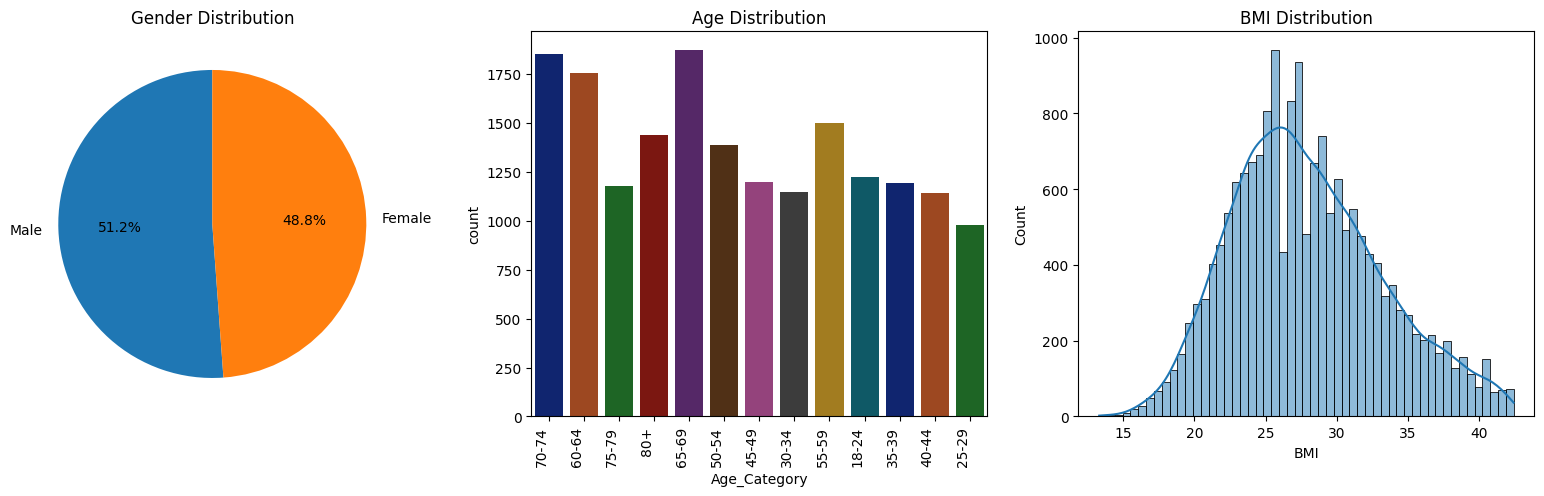

In [123]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].pie(data['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
sns.countplot(x = 'Age_Category', data = data, ax = ax[1],palette='dark').set_title('Age Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = data, ax = ax[2], kde = True,palette='dark').set_title('BMI Distribution')

The three visualizations provided illustrate the demographic characteristics of patients within the dataset. The pie chart reveals that the majority, accounting for 52%, are male, while females make up 48% of the patients. Analyzing the age distribution, it becomes apparent that a significant proportion of patients are aged 45 years or older, indicating a skewed distribution towards older individuals. The histogram depicting BMI demonstrates that most patients fall within the 25 to 30 range, indicating a prevalence of overweight individuals. Based on these observations, a hypothesis is formulated: patients with higher BMI are more prone to cardiovascular disease.

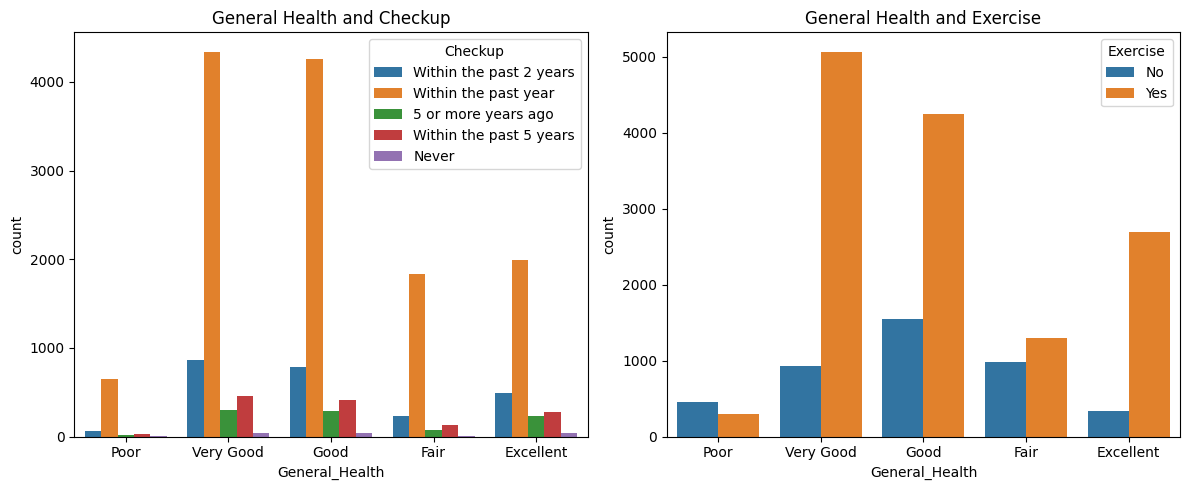

In [124]:
fig, ax = plt.subplots(1,2,figsize=(12, 5))

#General Health and Last Checkup
sns.countplot(x = 'General_Health', data = data, hue  = 'Checkup', ax = ax[0]).set_title('General Health and Checkup')

#Excersise and General Health
sns.countplot(x = 'General_Health', data = data, hue  = 'Exercise', ax = ax[1]).set_title('General Health and Exercise')

plt.tight_layout()

- Based on the first graph, the majority of individuals in the dataset report good or very good health, closely followed by excellent general health. This suggests that a large portion of the population represented is in a healthy state. Conversely, a small fraction of individuals report poor general health. Observing the timing of the last checkup across all general health categories, it is evident that most individuals have had their checkup within the past year. However, a considerable number of individuals have not undergone a checkup in the past 5 years or longer. This increases the likelihood of potential cardiovascular disease being present.

- The second graph clearly demonstrates the impact of exercise on overall health. Individuals who engage in regular exercise are more likely to report good, very good, or even excellent health. On the other hand, those who do not exercise are more prone to poor health. This highlights the crucial role of exercise in maintaining good overall health.

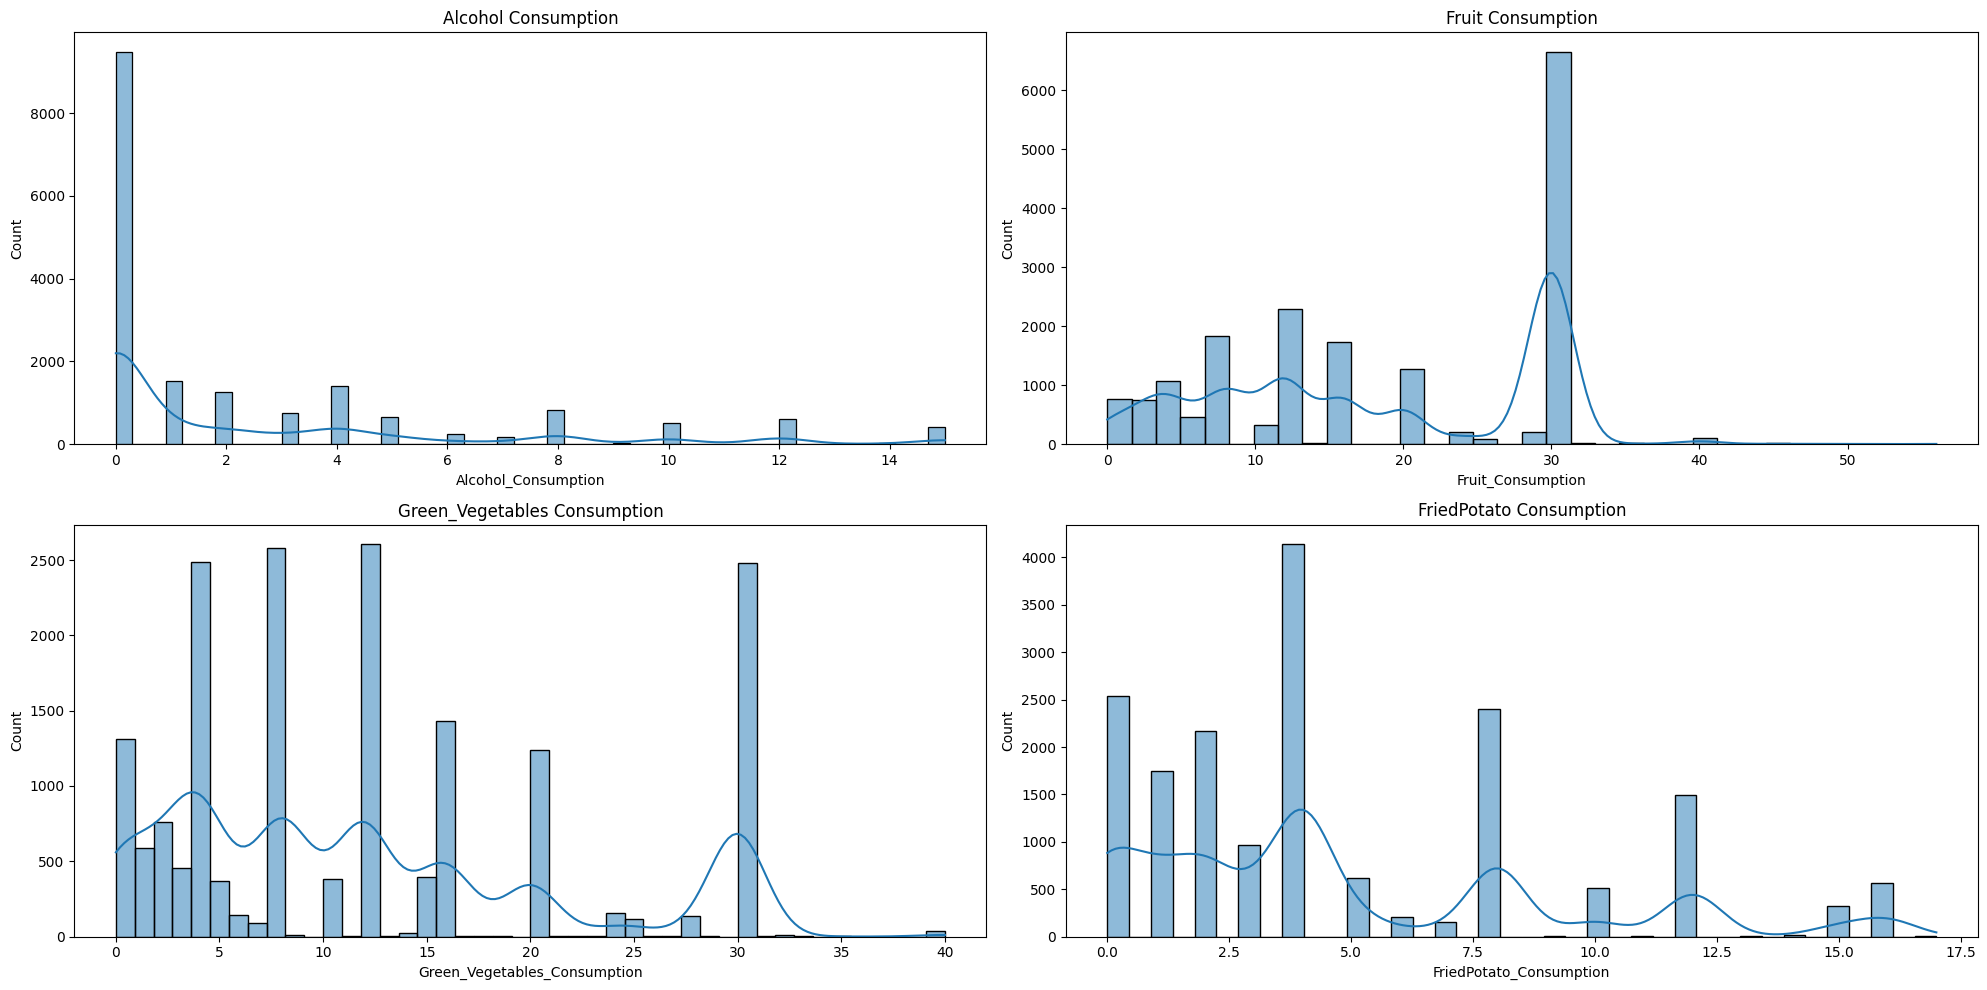

In [125]:
#Food Consumption
fig, ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(x = 'Alcohol_Consumption', data = data, ax = ax[0,0], kde = True).set_title('Alcohol Consumption')
sns.histplot(x = 'Fruit_Consumption', data = data, ax = ax[0,1], kde = True).set_title('Fruit Consumption')
sns.histplot(x = 'Green_Vegetables_Consumption', data = data, ax = ax[1,0], kde = True).set_title('Green_Vegetables Consumption')
sns.histplot(x = 'FriedPotato_Consumption', data = data, ax = ax[1,1], kde = True).set_title('FriedPotato Consumption')
plt.tight_layout()

The provided visualizations depict the dietary and drinking habits of the patients. It is evident from these plots that the majority of patients do not consume alcohol. Regarding food habits, a significant number of patients consume a higher quantity of fruits and green vegetables, which is beneficial for their health. However, it is concerning that a majority of patients also consume fried potatoes, which is considered unhealthy. This implies that patients who have a habit of consuming fried potatoes and alcohol are more prone to cardiovascular disease.

<ipython-input-126-9a129ed6d72e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Heart_Disease', data = data, ax = ax[0,0],palette='dark').set_title('Heart Disease')
<ipython-input-126-9a129ed6d72e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Skin_Cancer', data = data, ax = ax[0,1],palette='dark').set_title('Skin Cancer')
<ipython-input-126-9a129ed6d72e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Other_Cancer', data = data, ax = ax[0,2],palette='dark').set_title('Other Cancer')
<ipython-input-126-9a129ed6d72e

Text(0.5, 1.0, 'Arthritis')

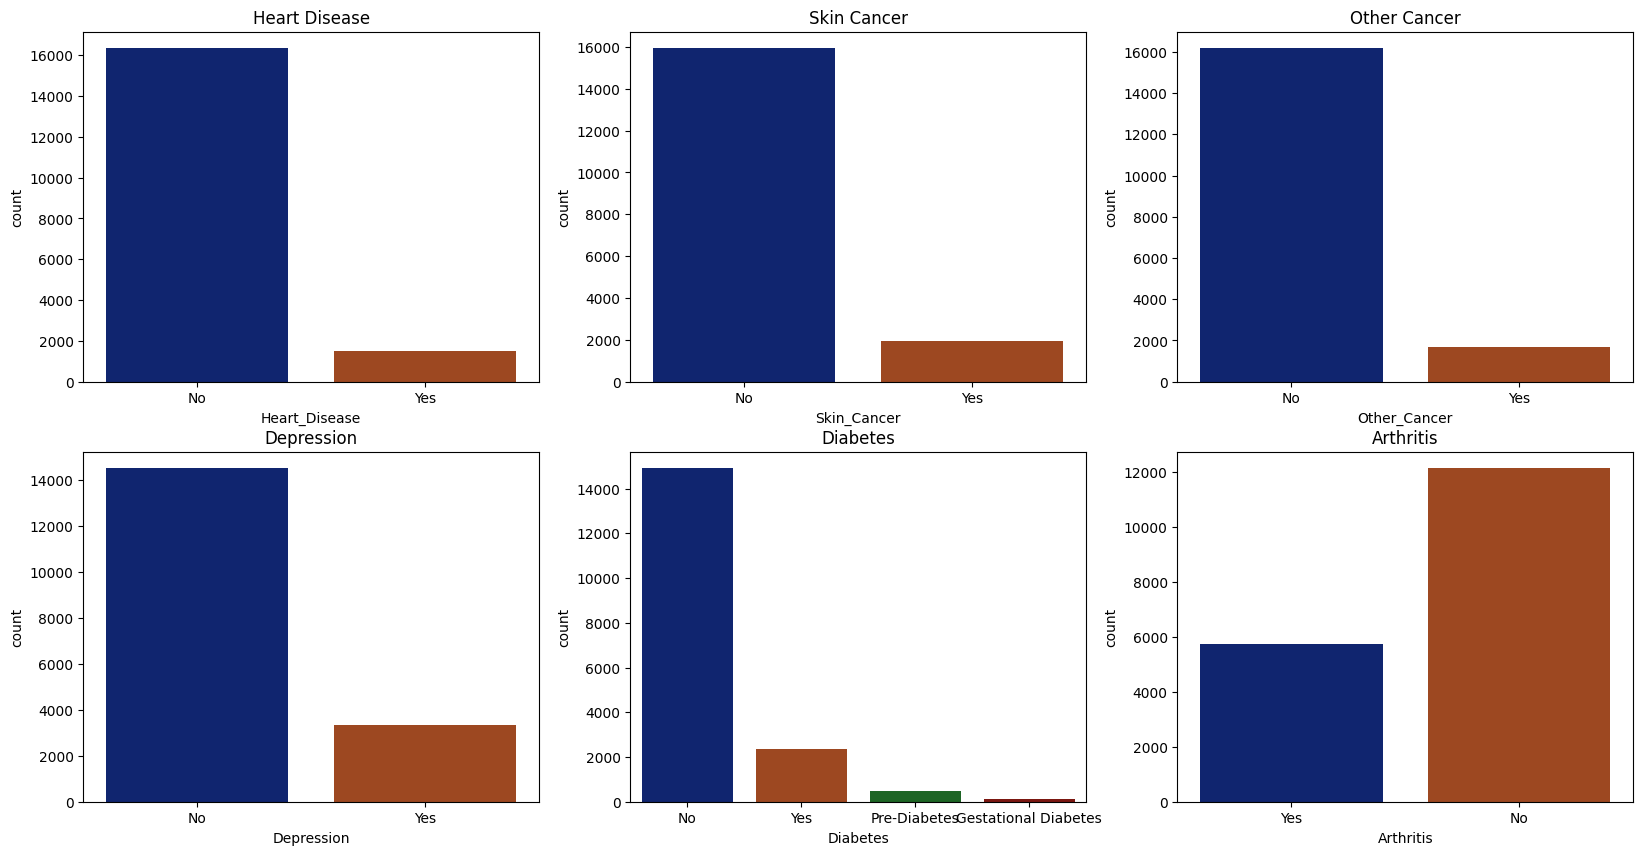

In [126]:
#Medical History
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Heart_Disease', data = data, ax = ax[0,0],palette='dark').set_title('Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = data, ax = ax[0,1],palette='dark').set_title('Skin Cancer')
sns.countplot(x = 'Other_Cancer', data = data, ax = ax[0,2],palette='dark').set_title('Other Cancer')
sns.countplot(x = 'Depression', data = data, ax = ax[1,0],palette='dark').set_title('Depression')
sns.countplot(x = 'Diabetes', data = data, ax = ax[1,1],palette='dark').set_title('Diabetes')
sns.countplot(x = 'Arthritis', data = data, ax = ax[1,2],palette='dark').set_title('Arthritis')

The majority of patients in the dataset do not have any medical conditions. However, there are individuals who are diagnosed with various conditions such as heart disease, skin cancer, other types of cancer, depression, diabetes, and arthritis. Notably, there is a higher prevalence of patients experiencing depression compared to other medical conditions. This highlights the importance for doctors to prioritize mental health alongside physical health. Additionally, a portion of the patients are classified as pre-diabetic, while some females experience gestational diabetes during pregnancy.

<ipython-input-127-fc895ca708f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Smoking_History', data = data, palette='dark' ).set_title('Smoking History')


Text(0.5, 1.0, 'Smoking History')

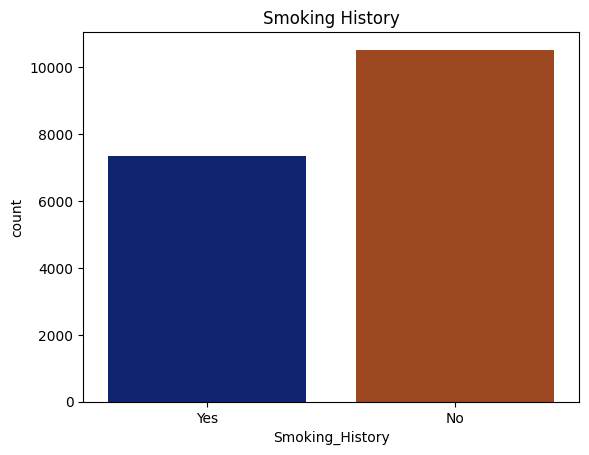

In [127]:
#Patient's Smoking History
sns.countplot(x = 'Smoking_History', data = data, palette='dark' ).set_title('Smoking History')

The presented graph illustrates the smoking history of patients included in the dataset. The majority of patients have never smoked, while there is a substantial number of patients who are currently smoking. This suggests that patients who are current smokers are more prone to cardiovascular disease.

<ipython-input-128-154d9663f64f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution and Heart Disease')

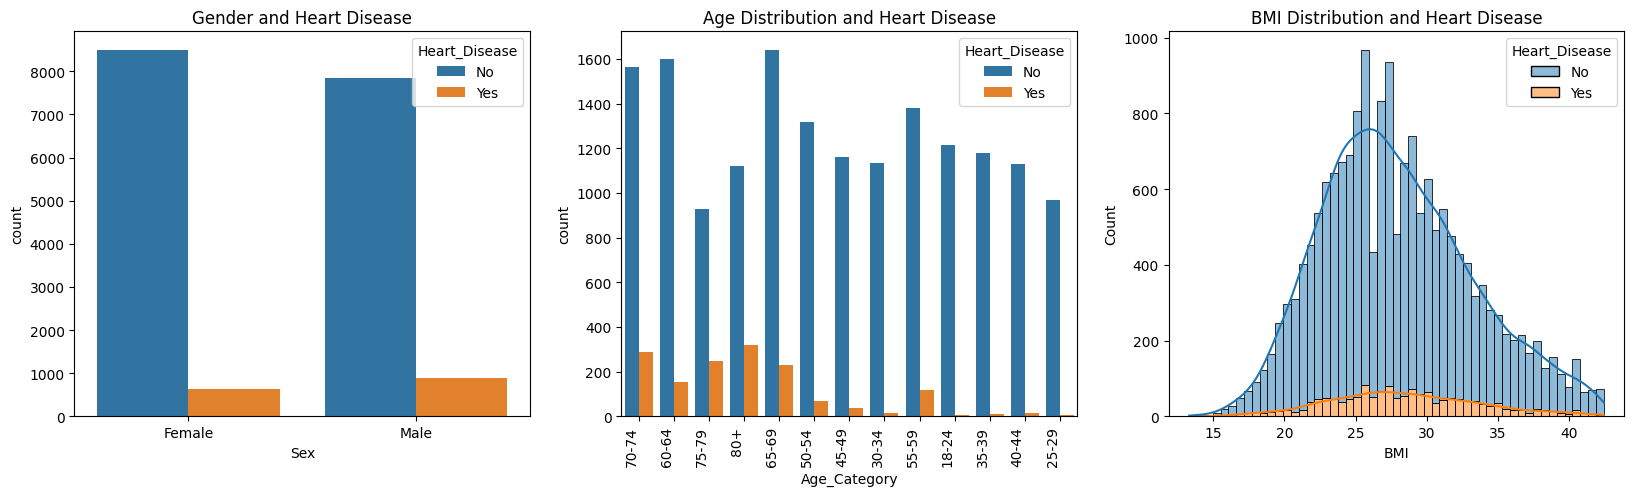

In [128]:
#Patient's Demographics and Heart Disease
fig, ax = plt.subplots(1,3,figsize=(20, 5))
sns.countplot(x = 'Sex', data = data, hue  = 'Heart_Disease', ax = ax[0]).set_title('Gender and Heart Disease')
sns.countplot(x = 'Age_Category', data = data, ax = ax[1], hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = data, ax = ax[2], kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

Examining the patient's demographics in relation to heart disease through visualizations provides valuable insights. Firstly, observing the Gender graph, it becomes apparent that males are more susceptible to heart disease compared to females. Moving on to the second graph, intriguing patterns emerge as patients over the age of 55 exhibit higher instances of heart disease compared to other age groups, with the highest number of cases occurring in patients aged 80 and above. This indicates that older patients are more vulnerable to cardiovascular disease, and the risk of developing such conditions increases with age. Lastly, the BMI graph illustrates that patients with a BMI ranging from 25 to 30, indicating overweight status, have a higher likelihood of developing heart disease.

Text(0.5, 1.0, 'Exercise and Heart Disease')

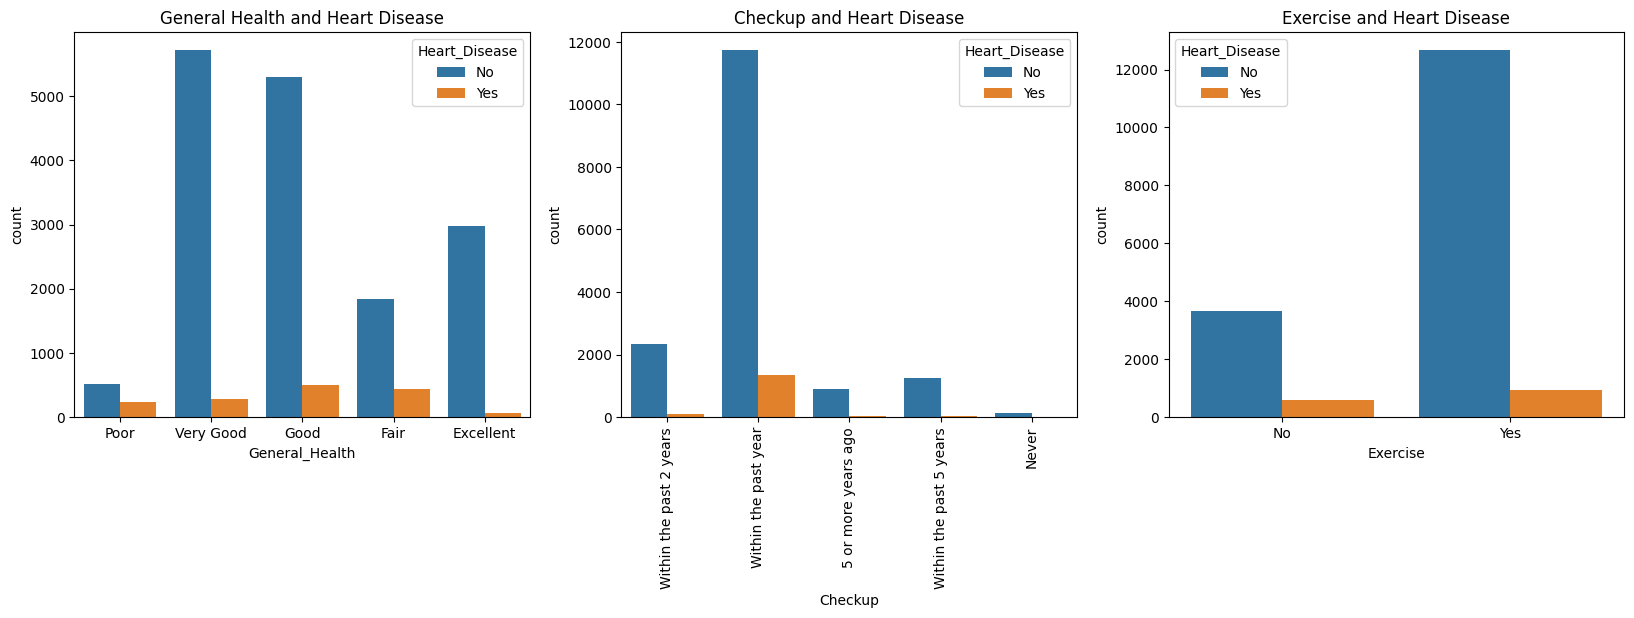

In [129]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))

#General Health and Heart Disease
sns.countplot(x = 'General_Health', data = data, hue  = 'Heart_Disease', ax = ax[0]).set_title('General Health and Heart Disease')

#Checkup and Heart Disease

sns.countplot(x = 'Checkup', data = data, hue  = 'Heart_Disease', ax = ax[1]).set_title('Checkup and Heart Disease')
ax[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

#Excercise and Heart Disease
sns.countplot(x = 'Exercise', data = data, hue  = 'Heart_Disease', ax = ax[2]).set_title('Exercise and Heart Disease')



- First graph contradicts my previous assumption that individuals in good health are less susceptible to heart disease. Surprisingly, the data reveals that patients categorized as having very good or good general health actually have a higher likelihood of developing heart disease compared to those with poor general health.
- Based on the second graph, patients who have undergone a checkup within the past year exhibit a higher probability of having heart disease. This implies that individuals who seek regular checkups have an increased likelihood of detecting cardiovascular disease at an early stage compared to those who do not prioritize regular checkups.
- Surprisingly, the third graph reveals that patients who engage in exercise have higher rates of heart disease. This contradicts the common belief that individuals who exercise regularly are less susceptible to heart disease. On the other hand, the data suggests that patients who do not exercise are actually less prone to heart disease. One possibility for this unexpected finding is that individuals with pre-existing weak hearts may inadvertently place excessive strain on their hearts through exercise, leading to the development of heart disease.

<ipython-input-130-08723800a12d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Heart_Disease', y = 'Alcohol_Consumption', data = data, ax = ax[0,0],palette='Set3').set_title('Alcohol Consumption and Heart Disease')
<ipython-input-130-08723800a12d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Heart_Disease', y = 'Fruit_Consumption', data = data, ax = ax[0,1],palette='Set3').set_title('Fruit Consumption and Heart Disease')
<ipython-input-130-08723800a12d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'Heart_Dis

Text(0.5, 1.0, 'FriedPotato Consumption and Heart Disease')

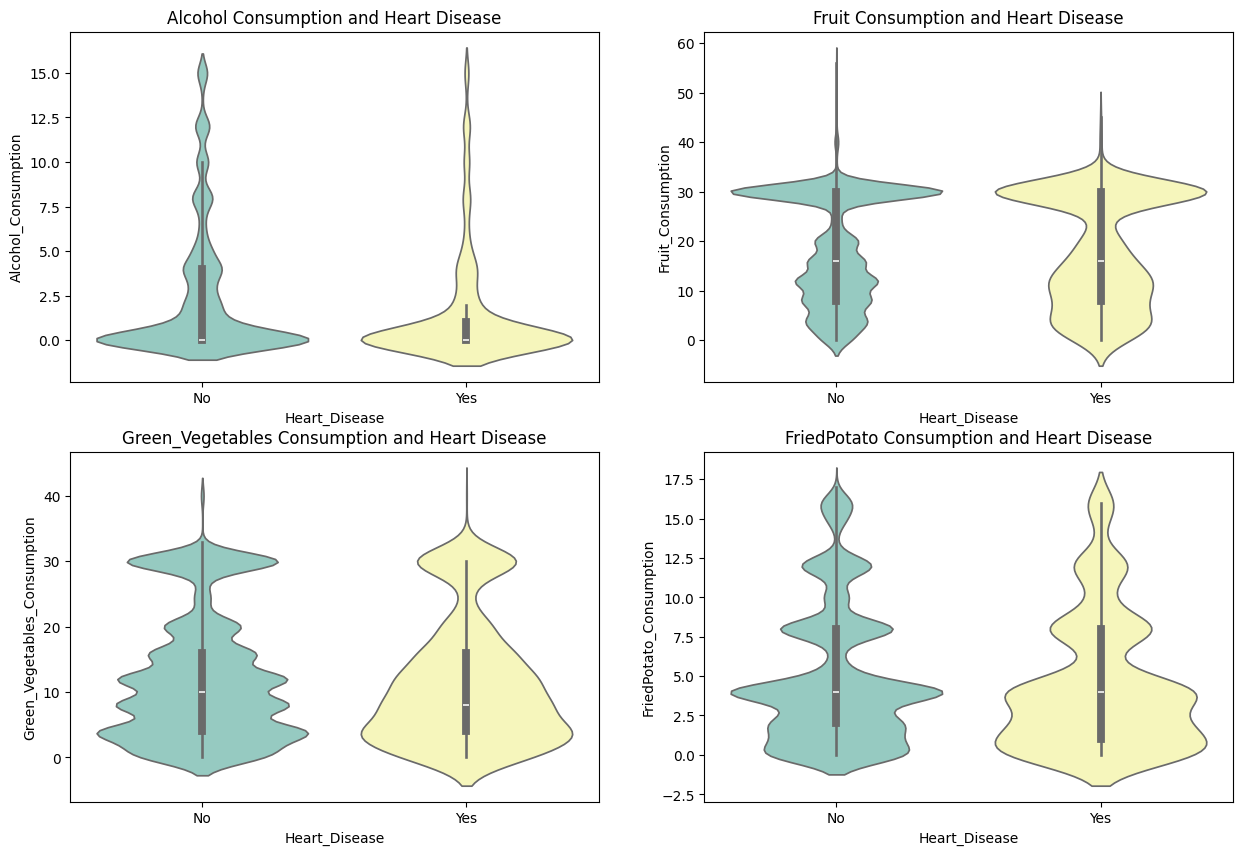

In [130]:
#Food Consumption and Heart disease
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.violinplot(x = 'Heart_Disease', y = 'Alcohol_Consumption', data = data, ax = ax[0,0],palette='Set3').set_title('Alcohol Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Fruit_Consumption', data = data, ax = ax[0,1],palette='Set3').set_title('Fruit Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Green_Vegetables_Consumption', data = data, ax = ax[1,0],palette='Set3').set_title('Green_Vegetables Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'FriedPotato_Consumption', data = data, ax = ax[1,1],palette='Set3').set_title('FriedPotato Consumption and Heart Disease')

The provided graphs depict the relationship between patients' food and drinking habits and their likelihood of having heart disease. Examining the alcohol consumption graph, it becomes evident that patients who consume higher amounts of alcohol have a lower probability of developing heart disease. Conversely, patients who have a higher intake of fruits and green vegetables tend to have a reduced risk of heart disease. Additionally, there is a higher risk of heart disease associated with patients who consume larger quantities of fried potatoes.

Text(0.5, 1.0, 'Arthritis and Heart Disease')

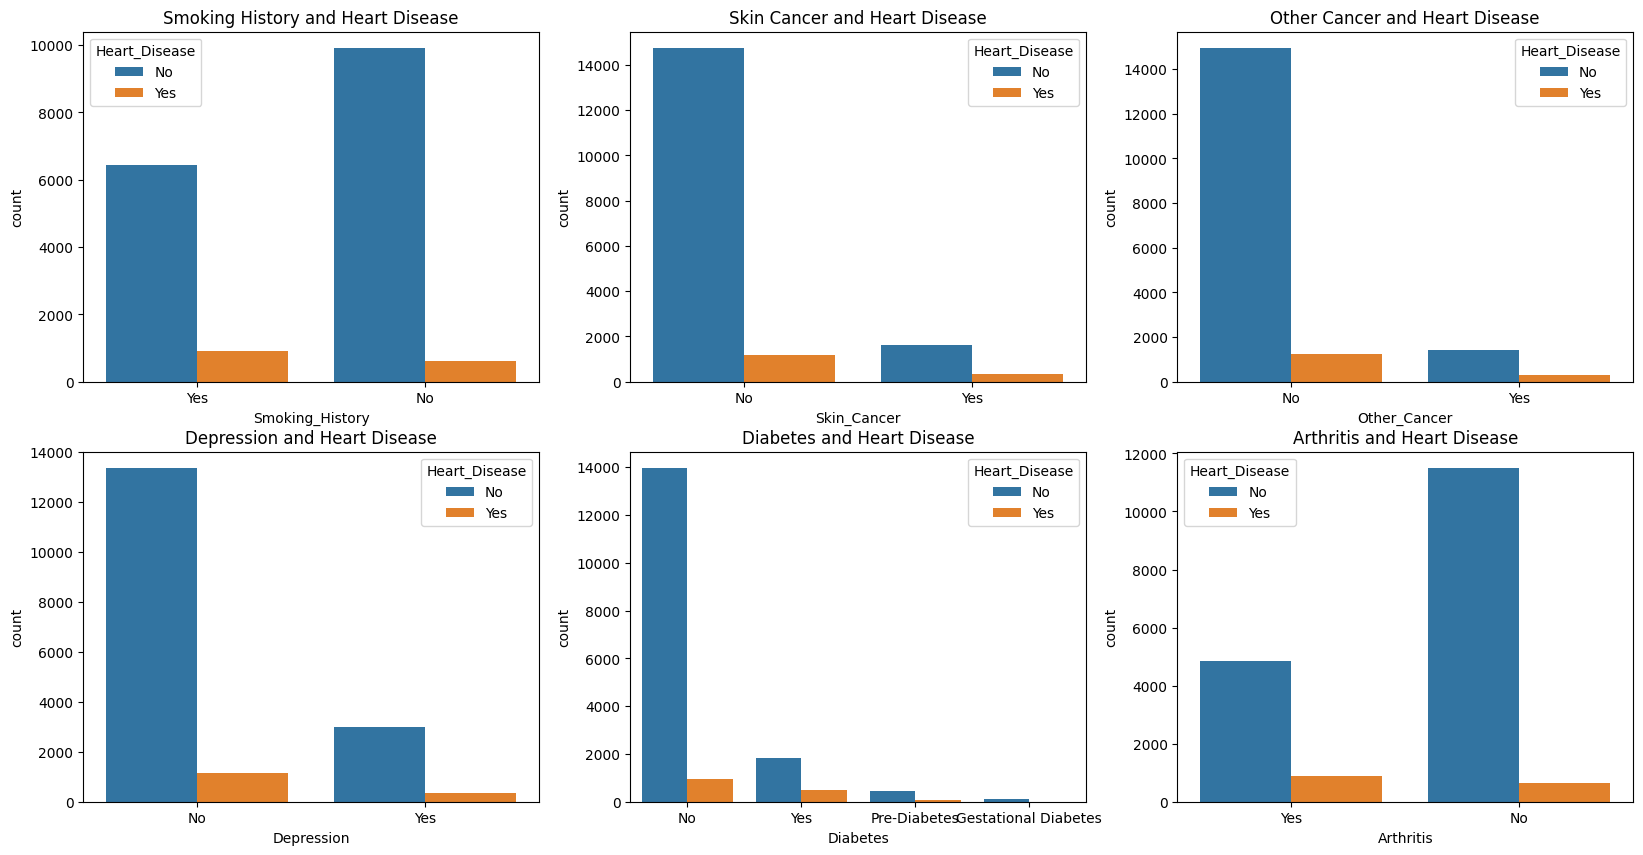

In [131]:
#Medical History and Heart Disease
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Smoking_History', data = data, ax = ax[0,0], hue = 'Heart_Disease').set_title('Smoking History and Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = data, ax = ax[0,1], hue = 'Heart_Disease').set_title('Skin Cancer and Heart Disease')
sns.countplot(x = 'Other_Cancer', data = data, ax = ax[0,2], hue = 'Heart_Disease').set_title('Other Cancer and Heart Disease')
sns.countplot(x = 'Depression', data = data, ax = ax[1,0], hue = 'Heart_Disease').set_title('Depression and Heart Disease')
sns.countplot(x = 'Diabetes', data = data, ax = ax[1,1], hue = 'Heart_Disease').set_title('Diabetes and Heart Disease')
sns.countplot(x = 'Arthritis', data = data, ax = ax[1,2], hue = 'Heart_Disease').set_title('Arthritis and Heart Disease')

These graphs illustrate the relationship between patients' medical history and the occurrence of heart disease. In the first graph, which focuses on smoking history, it is apparent that patients who currently smoke or have a history of smoking tend to have a higher prevalence of cardiovascular disease. Moving on to the second graph, patients without a history of skin cancer exhibit a greater number of heart disease cases compared to those with a history of skin cancer. Similarly, the third graph indicates that patients without any form of cancer have a higher incidence of cardiovascular disease. Examining the fourth graph, patients without depression have a higher likelihood of developing heart disease compared to their counterparts. In the fifth graph, patients without diabetes have a higher occurrence of heart disease, while the presence of pre-diabetes or gestational diabetes does not significantly impact heart disease. Lastly, the sixth graph reveals that patients without arthritis have a higher number of heart disease cases compared to those with arthritis.

### 4.2 Correlation <a name="Correlation"></a>

In [133]:
# List of categorical variables
cols = ['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer',
        'Other_Cancer','Depression','Diabetes','Arthritis',	'Sex',	'Age_Category', 'Smoking_History']

# Label encoding object
LE = LabelEncoder()
for i in cols:
    LE.fit(data[i])
    data[i] = LE.transform(data[i])
    print(i, data[i].unique())

General_Health [3 4 2 1 0]
Checkup [2 4 0 3 1]
Exercise [0 1]
Heart_Disease [0 1]
Skin_Cancer [0 1]
Other_Cancer [0 1]
Depression [0 1]
Diabetes [1 3 2 0]
Arthritis [1 0]
Sex [0 1]
Age_Category [10  8 11 12  9  6  5  2  7  0  3  4  1]
Smoking_History [1 0]


In [134]:
data.corr()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,1.000000,0.028486,0.034018,-0.016019,0.013454,0.017448,-0.012241,-0.030106,0.014221,-0.018874,0.028103,0.015451,-0.003464,0.037871,0.008563,0.012444,0.022481
Checkup,0.028486,1.000000,-0.035506,0.093621,0.094730,0.083578,0.043176,0.146564,0.165780,-0.104631,0.224504,0.059834,-0.008380,-0.058257,0.050535,0.043948,-0.043841
Exercise,0.034018,-0.035506,1.000000,-0.104780,-0.020844,-0.055771,-0.075756,-0.139961,-0.132345,0.101628,-0.157068,-0.109405,-0.097510,0.152543,0.140197,0.145766,0.005069
Heart_Disease,-0.016019,0.093621,-0.104780,1.000000,0.106309,0.096921,0.038614,0.185467,0.166057,0.056147,0.245978,0.032926,0.115301,-0.076952,-0.009676,-0.022508,-0.030676
Skin_Cancer,0.013454,0.094730,-0.020844,0.106309,1.000000,0.147647,0.002497,0.054868,0.164322,0.013807,0.298603,-0.016754,0.044327,-0.024364,0.030012,0.030815,-0.042578
Other_Cancer,0.017448,0.083578,-0.055771,0.096921,0.147647,1.000000,0.014242,0.069506,0.155127,-0.052411,0.241338,-0.005092,0.045447,-0.054924,-0.000346,-0.000942,-0.067708
Depression,-0.012241,0.043176,-0.075756,0.038614,0.002497,0.014242,1.000000,0.047572,0.142739,-0.135953,-0.069206,0.066405,0.110587,-0.021091,-0.052821,-0.057908,0.007024
Diabetes,-0.030106,0.146564,-0.139961,0.185467,0.054868,0.069506,0.047572,1.000000,0.147317,0.023281,0.241445,0.185732,0.062369,-0.131735,-0.011250,-0.024478,-0.038862
Arthritis,0.014221,0.165780,-0.132345,0.166057,0.164322,0.155127,0.142739,0.147317,1.000000,-0.118638,0.394542,0.127044,0.145571,-0.101648,-0.013087,-0.016376,-0.075060
Sex,-0.018874,-0.104631,0.101628,0.056147,0.013807,-0.052411,-0.135953,0.023281,-0.118638,1.000000,-0.095150,0.018613,0.069808,0.101672,-0.050776,-0.044534,0.159382


<Axes: >

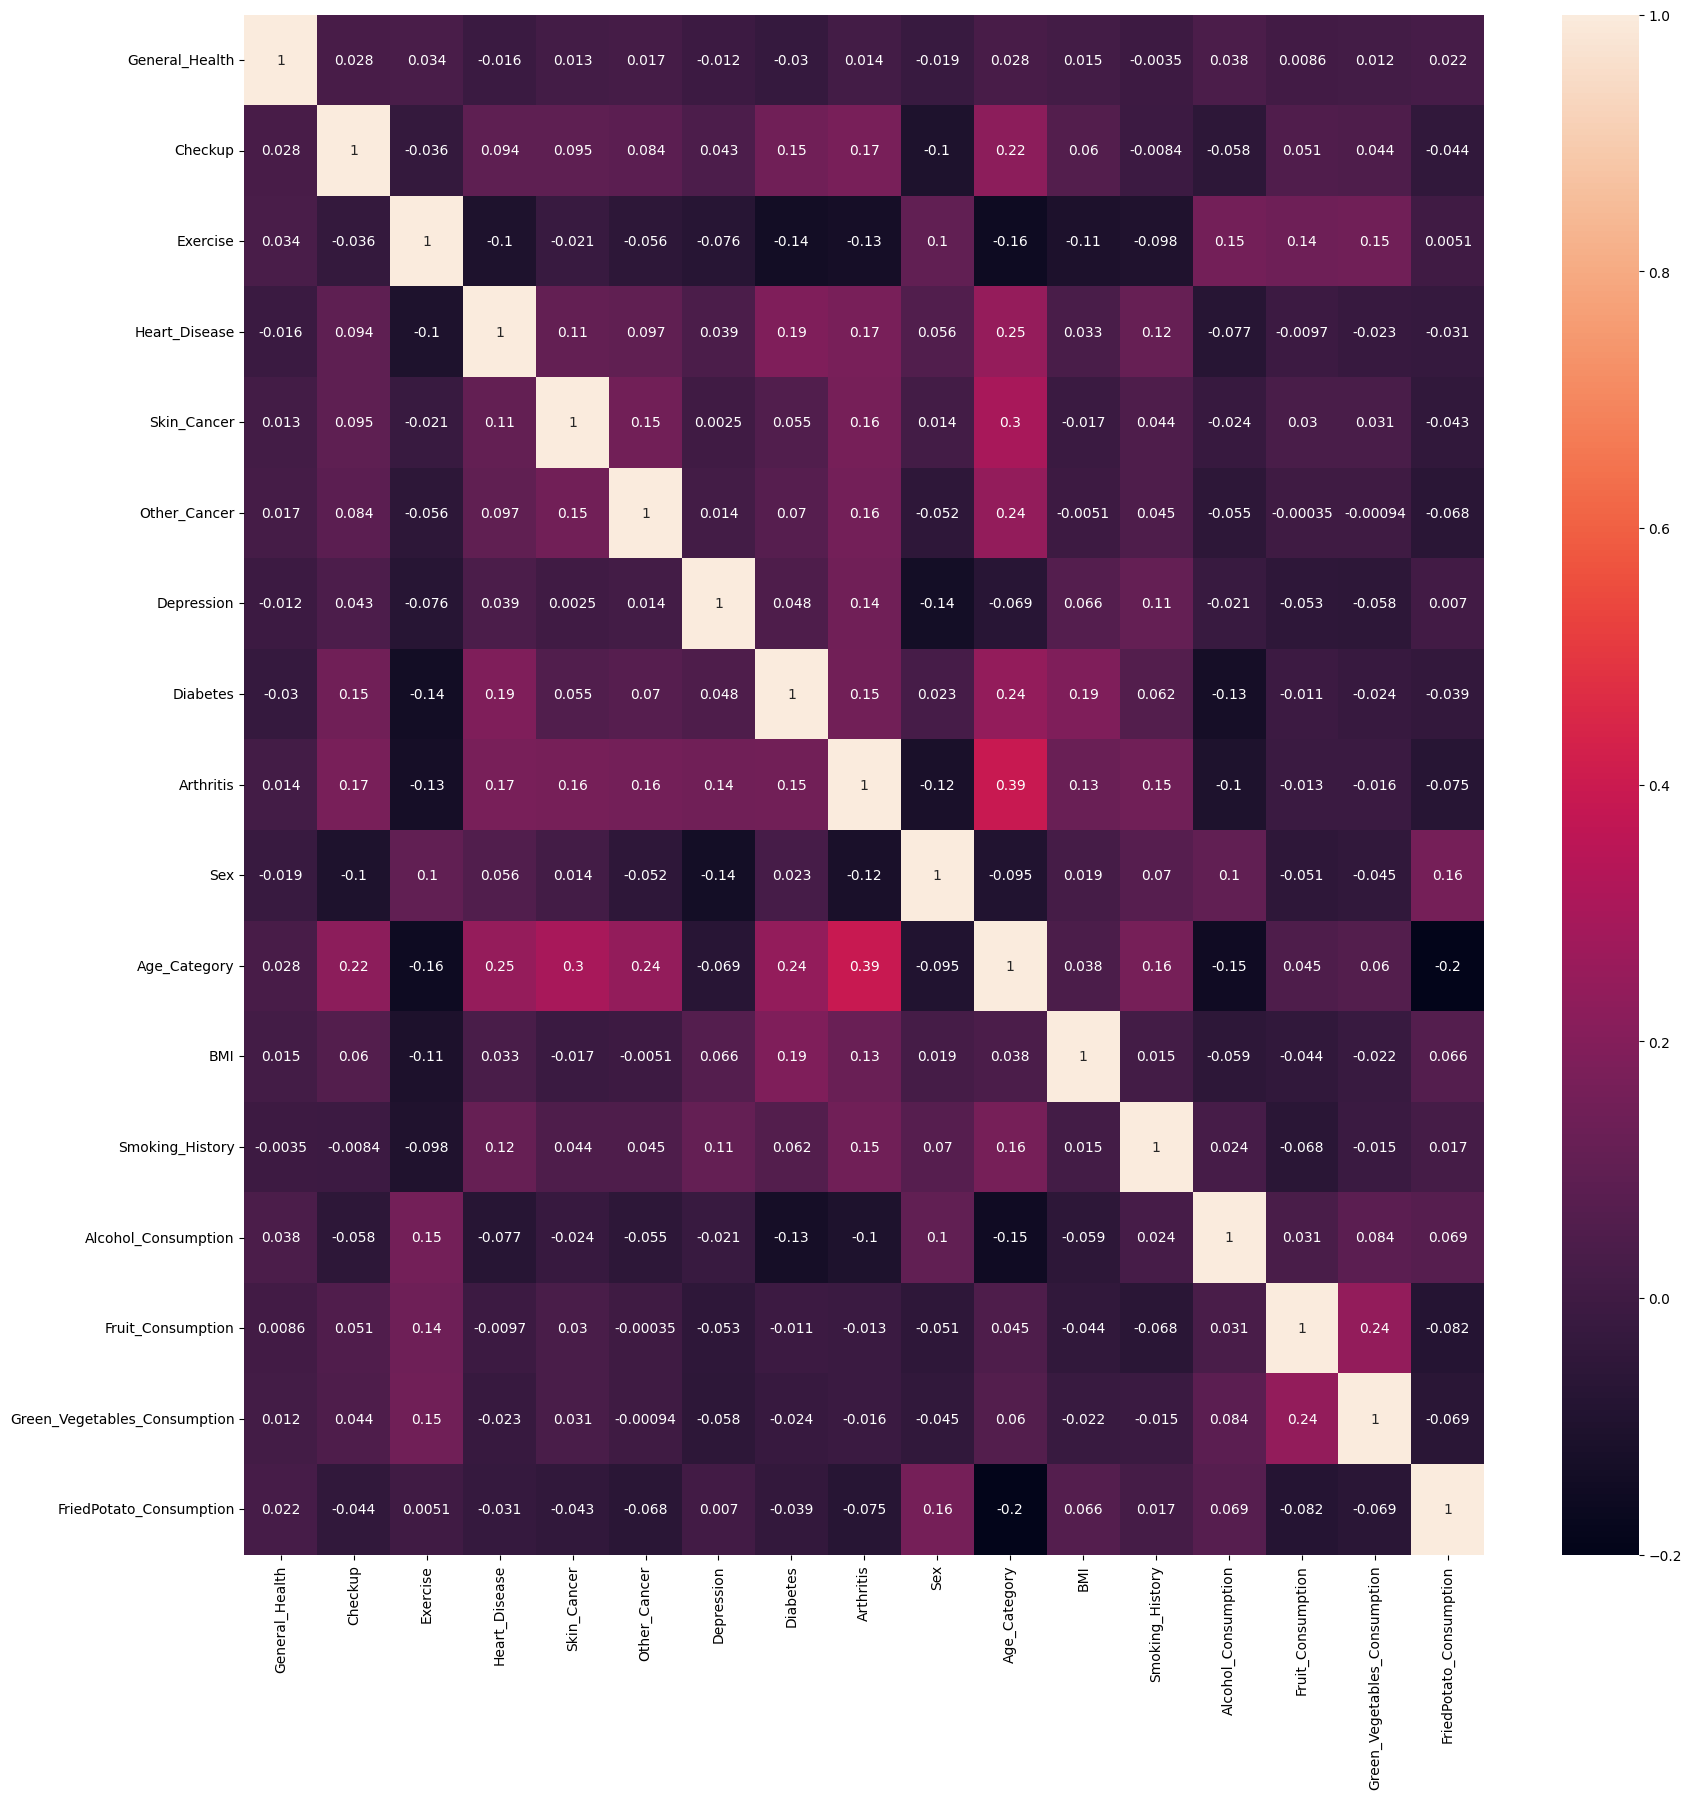

In [135]:
# create a heatmap to check the correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## 5. Model Building <a name="Model-Building"></a>
In thise section we build predictive models using machine learning algorithms.
First we have to split the dataset for training and testing.


In [136]:
x = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape,y_train.shape)

(12503, 16) (12503,)


### 5.1 Decision Tree <a name="Decision-Tree"></a>

In [140]:
# Create Decision Tree object
dtree = DecisionTreeClassifier(random_state=0, max_depth= 12, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')

# Training the model
dtree.fit(X_train, y_train)

# Training accuracy
dtree.score(X_train, y_train)

0.7937295049188194

In [143]:
# Predicting the test set results
dtree_pred = dtree.predict(X_test)

### 5.2 Random Forest <a name="Random-Forest"></a>

In [145]:
# Create Random Forest object
rf = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, class_weight='balanced')

# Training the model
rf.fit(X_train, y_train)

# Training accuracy
rf.score(X_train, y_train)

1.0

In [147]:
# Predicting the test set results
rf_pred = rf.predict(X_test)

### 5.3 Logistic Regression <a name="Logistic-Regression"></a>

In [148]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

#Training accuracy
logreg.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9123410381508438

In [150]:
#Predicting the test set results
logreg_pred = logreg.predict(X_test)

## 6. Evaluation <a name="Evaluation"></a>
In this secton we evaluate the performance of the models and compare them.

### 6.1 Confusion Matrix <a name="Confusion-Matrix"></a>

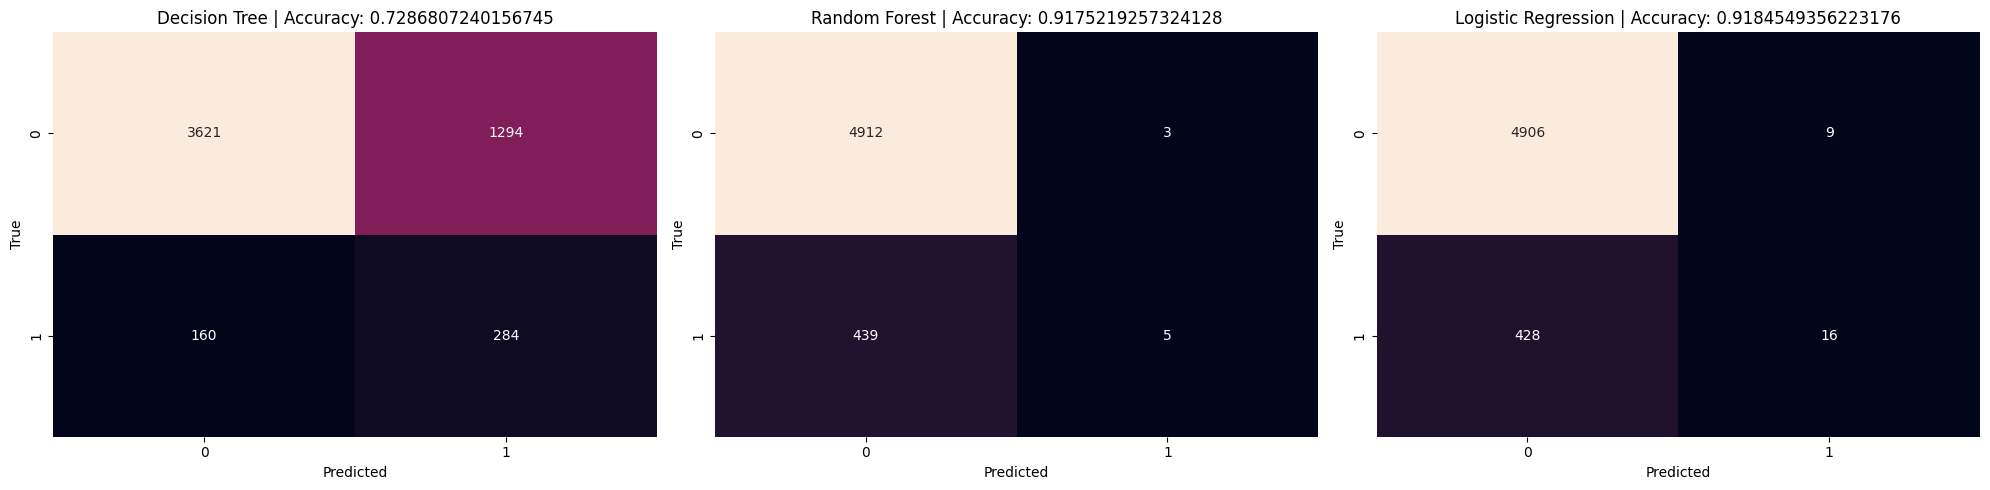

In [153]:
# List of model names
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression']

# List of predicted labels for each model
predicted_labels = [dtree_pred, rf_pred, logreg_pred]

#List of model accuracy
accuracy = [dtree.score(X_test,y_test),rf.score(X_test,y_test), logreg.score(X_test,y_test)]

# List of confusion matrices for each model
confusion_matrices = [confusion_matrix(y_test, predicted) for predicted in predicted_labels]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Iterate over each model and plot the confusion matrix
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cbar=False, ax=ax)
    ax.set_title("{0} | Accuracy: {1}".format(model_names[i],accuracy[i]))
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The diagonal boxes in the matrix represent the number of true positive results, indicating the correct predictions made by the model. On the other hand, the off-diagonal boxes represent the number of false positive results, indicating the incorrect predictions made by the model.


### 6.2 Other Metrics <a name="Other-Metrics"></a>

In [155]:
#Decision Tree
print(classification_report(y_test, predicted_labels[0]))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83      4915
           1       0.18      0.64      0.28       444

    accuracy                           0.73      5359
   macro avg       0.57      0.69      0.56      5359
weighted avg       0.89      0.73      0.79      5359



In [156]:
#Random Forest
print(classification_report(y_test, predicted_labels[1]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4915
           1       0.62      0.01      0.02       444

    accuracy                           0.92      5359
   macro avg       0.77      0.51      0.49      5359
weighted avg       0.89      0.92      0.88      5359



In [157]:
#Logistic Regression
print(classification_report(y_test, predicted_labels[2]))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4915
           1       0.64      0.04      0.07       444

    accuracy                           0.92      5359
   macro avg       0.78      0.52      0.51      5359
weighted avg       0.90      0.92      0.88      5359



## 7. Conclusion <a name="Conclusion"></a>
The exploratory data analysis revealed several findings regarding the risk factors associated with cardiovascular disease. These findings can be summarized as follows:

1. Age: The risk of cardiovascular disease increases with age, particularly for individuals above 55 years old. The highest number of patients with cardiovascular disease were found in the 80+ age group.

2. BMI: Higher BMI was found to be associated with an increased likelihood of cardiovascular disease. Patients with higher body mass index are more prone to developing this condition.

3. Exercise: Surprisingly, older age patients who engage in exercise were found to be more susceptible to cardiovascular disease. This could be attributed to the additional strain placed on the heart during exercise.

4. Dietary Habits: The study found that dietary habits play a role in cardiovascular disease. Patients who consume a higher amount of fruits and green vegetables have a lower likelihood of developing cardiovascular disease. Conversely, patients who consume fried potatoes have a higher risk of cardiovascular disease.

5. Smoking: Smoking or a history of smoking was found to be a significant risk factor for cardiovascular disease. Patients who smoke or used to smoke are more prone to developing this condition.

6. Previous Medical History: Contrary to expectations, the analysis showed that previous medical conditions such as cancer, arthritis, diabetes, or depression did not have a major effect on the likelihood of developing cardiovascular disease.

In conclusion, age, BMI, exercise, dietary habits, and smoking were identified as important risk factors for cardiovascular disease based on the exploratory data analysis. These findings suggest the need for lifestyle modifications, such as healthier dietary choices and smoking cessation, to reduce the risk of developing cardiovascular disease.

<br>

Based on the results of cardiovascular disease prediction using Decision Tree, Random Forest, and Logistic Regression models, the following observations can be made:

1. Decision Tree: The Decision Tree model achieved an accuracy of 73% in predicting cardiovascular disease. It showed relatively high precision for classifying non-heart disease cases (0) but had a lower precision for predicting heart disease cases (1). The recall for heart disease cases was relatively high (64%), indicating that the model was able to identify a significant portion of the positive cases.

2. Random Forest: The Random Forest model achieved a higher accuracy of 92% in predicting cardiovascular disease. However, it performed poorly in terms of recall for heart disease cases (1%), indicating that the model had difficulty correctly identifying positive cases. The precision for heart disease cases was also low.

3. Logistic Regression: The Logistic Regression model achieved the same accuracy of 92% as the Random Forest model. However, it also had low recall for heart disease cases (4%) and a relatively low precision for predicting heart disease.

Overall, while both the Random Forest and Logistic Regression models achieved high accuracy, they struggled to correctly identify individuals with cardiovascular disease. The Decision Tree model showed better recall for heart disease cases but had lower precision.

Future Works:

1. Feature Engineering: In future work, more comprehensive feature engineering can be explored to improve the predictive performance of the models. This could involve considering additional relevant variables or transforming existing ones to capture more nuanced relationships with cardiovascular disease.

2. Model Optimization: The performance of the models can be improved by optimizing hyperparameters through techniques such as grid search or random search. This would involve systematically exploring different combinations of hyperparameters to find the best configuration for each model.

3. Ensemble Methods: Ensembling techniques, such as combining the predictions of multiple models, can be employed to enhance the overall predictive power. This could involve using techniques like stacking, where the predictions of multiple models are combined using another model as a meta-learner.

4. Data Collection: Collecting more diverse and comprehensive data, including a larger sample size and a wider range of features, could provide a more robust foundation for training the models and potentially improve their performance.

5. Domain Expertise: Involving domain experts, such as cardiologists, in the model development process can provide valuable insights and help refine the models to better capture the intricacies of cardiovascular disease.
